In [25]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [26]:
x,y = make_blobs(n_samples=100,n_features=10)

In [27]:
x

array([[ 3.05434631e+00,  1.12866928e+00, -7.81976409e+00,
        -3.39753648e+00, -5.83093952e+00,  9.71848416e+00,
         4.23586815e+00, -3.56279716e+00,  1.06757349e+01,
        -1.39428456e+00],
       [ 5.65130635e+00,  1.00865632e+00, -5.02441788e+00,
        -2.10064078e+00, -4.91788502e+00,  8.34228871e+00,
         3.67948123e+00, -4.51260240e+00,  8.94787489e+00,
        -2.54950063e+00],
       [ 3.70328834e+00,  3.31984276e+00, -6.91235126e+00,
        -2.55879579e+00, -5.60465808e+00,  7.71874355e+00,
         3.36459042e+00, -5.27649163e+00,  1.13307865e+01,
         5.60621701e-02],
       [ 9.52281233e+00, -1.52605810e-01, -1.26876148e+00,
         3.32565792e+00, -1.01116633e+01, -5.08347010e+00,
        -4.84101569e+00, -8.99181758e+00, -3.68308954e+00,
        -6.22901435e+00],
       [ 1.10247894e+01,  1.79821971e+00, -1.79022985e+00,
         4.04089429e+00, -9.49690599e+00, -2.72800014e+00,
        -2.98082377e+00, -9.32342355e+00, -1.74438814e+00,
        -7.

In [28]:
y

array([1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 0,
       1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0])

In [29]:
pca = PCA(n_components=4)
print('before',x.shape)

before (100, 10)


In [30]:
pca.fit(x)

PCA(n_components=4)

In [31]:
x=pca.transform(x)
# x=pca.fit_transform(x)

In [32]:
print('after',x.shape)

after (100, 4)


In [33]:
pca.explained_variance_ratio_

array([0.7691749 , 0.1997501 , 0.00564818, 0.00512314])

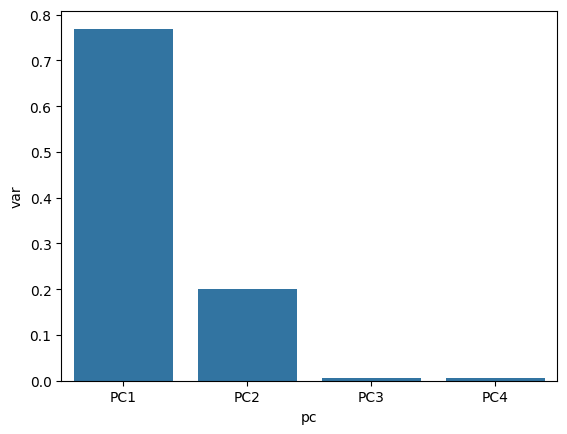

In [34]:
df=pd.DataFrame(
    {'var':pca.explained_variance_ratio_,
     'pc':['PC1','PC2','PC3','PC4']}
)
sb.barplot(x='pc',data=df,y='var')
plt.show()

In [35]:
iris=sb.load_dataset('iris')
print(iris.shape)
print(iris.keys())
x=iris.drop('species',axis=1)
y=iris['species']

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [36]:
pca = PCA(n_components=3)
print('before',x.shape)
print(x)

before (150, 4)
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [37]:
x_pca=pca.fit_transform(x)

In [38]:
print('after',x_pca.shape)
x_pca

after (150, 3)


array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [39]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [40]:
x['PCA1']=x_pca[:,0]
x['PCA2']=x_pca[:,1]
x['PCA3']=x_pca[:,2]

In [41]:
x

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,0.090079
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.944110,0.187532,0.177825
146,6.3,2.5,5.0,1.9,1.527167,-0.375317,-0.121898
147,6.5,3.0,5.2,2.0,1.764346,0.078859,0.130482
148,6.2,3.4,5.4,2.3,1.900942,0.116628,0.723252


In [42]:
X_train,x_test,Y_train,y_test = train_test_split(x, y, random_state=1)

In [43]:
#Select PCA column
X_train = X_train.loc[:,['PCA1','PCA2','PCA3']]
x_test = x_test.loc[:,['PCA1','PCA2','PCA3']]

In [44]:
model = GaussianNB()

In [45]:
model.fit(X_train,Y_train)

GaussianNB()

In [46]:
y_pred = model.predict(x_test)

In [47]:
print("accuracy_score :",accuracy_score(y_test,y_pred))

accuracy_score : 0.9473684210526315
